<a href="https://colab.research.google.com/github/floflokie/SSL/blob/main/Learning_Representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART I: Learning Representations from Text**

In this part of the practical work, students will explore the application of **Word2Vec** for learning word embeddings from a large textual dataset, specifically the **Reuters** corpus. The exercise begins by loading and preprocessing the corpus using **NLTK**, where text data is tokenized and cleaned to prepare it for the model. Once preprocessed, students will train a **Word2Vec** model using **Gensim**, which will learn dense vector representations of words. These embeddings capture semantic relationships between words based on their context in the text. After training, students will explore the learned embeddings by finding similar words to a given input and solving word analogies (e.g., "king" is to "queen" as "man" is to "woman"). Finally, students will visualize the learned word embeddings using **Principal Component Analysis (PCA)** to reduce the dimensionality of the embeddings and display them in a 2D space. This visualization will help students understand how the model organizes semantically related words into clusters.


## Preprocessing the Reuters Dataset

### Steps:

1. **Download and Load the Reuters Dataset:**
   - Use the `nltk` library to download and load the **Reuters** corpus. This dataset contains financial news articles which will be used for text processing.
   - Ensure that the required resources (such as tokenizers) are downloaded using `nltk.download()`.

2. **Dataset Splitting:**
   - Separate the dataset into two subsets: one for training and one for testing. This will allow models to be trained on one set and evaluated on another.
   - The `reuters.fileids()` method provides a list of document identifiers. Use these to split the documents into training and test sets based on the file identifier (documents that start with "train" or "test").

3. **Preprocess the Text:**
   - Write a function that:
     - Converts all text to lowercase.
     - Tokenizes the text (i.e., splits the text into individual words) using `nltk.tokenize.word_tokenize()`.
     - Removes punctuation by filtering out any tokens that are not alphabetic (using `isalpha()`).
   - Apply this preprocessing function to both the training and test sets.

4. **Display Example Tokens:**
   - After preprocessing, display the first 10 tokens of a preprocessed training document to verify that the function is working correctly.


In [1]:
import nltk
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
import string

# Download the Reuters dataset and required NLTK resources
print("Downloading the Reuters dataset")
nltk.download('reuters')
nltk.download('punkt')

# Load Reuters documents
documents = reuters.fileids()

# Separate the dataset into training and test sets
print("Separating the dataset into training and test sets")
train_docs = [reuters.raw(doc_id) for doc_id in documents if doc_id.startswith('train')]
test_docs = [reuters.raw(doc_id) for doc_id in documents if doc_id.startswith('test')]

# Function to preprocess text: tokenize and clean
def preprocess(text):
    # Convert to lowercase and tokenize
    lowercase = text.lower()
    tokens = word_tokenize(lowercase)
    # remove punctuation by filtering out any tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # Remove punctuation
    return tokens

# Apply preprocessing to the documents in train and test
print("Preprocessing")
train_tokens = [preprocess(doc) for doc in train_docs]
test_tokens = [preprocess(doc) for doc in test_docs]


# Display a few tokens as an example
print("Example the first 10 tokens of a preprocessed training document:")
print(train_tokens[0][:10])


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Separating the dataset into training and test sets
Preprocessing
Example the first 10 tokens of a preprocessed training document:
['bahia', 'cocoa', 'review', 'showers', 'continued', 'throughout', 'the', 'week', 'in', 'the']


## Training a Word2Vec Model

### Steps:

1. **Train the Word2Vec Model:**
   - Use the **Gensim** library to train a Word2Vec model on the preprocessed and tokenized dataset.
   - Set the following parameters for the model:
     - `vector_size=100`: The dimensionality of the word vectors.
     - `window=5`: The maximum distance between the current and predicted word within a sentence.
     - `min_count=5`: Ignores words that appear less than 5 times in the corpus.
     - `workers=4`: Use 4 CPU threads to speed up training.

2. **Save the Trained Model:**
   - Once the model is trained, save it to a file for future use. This allows you to load the trained embeddings later without retraining the model from scratch.

3. **Check Vocabulary Size:**
   - After training, display the size of the vocabulary that the Word2Vec model has learned. The vocabulary consists of all unique words in the corpus that meet the `min_count` threshold.


In [2]:
from gensim.models import Word2Vec

# Train the Word2Vec model on the tokenized data
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=5, workers=4)

# Save the trained model
word2vec_model.save("word2vec_reuters.model")

# Display model information
print(f"Vocabulary size: {len(word2vec_model.wv.key_to_index)}")


Vocabulary size: 8547


## Exploring Word Embeddings with Word2Vec

### Steps:

1. **Load the Trained Word2Vec Model:**
   - Load the previously trained Word2Vec model from the saved file (`word2vec_reuters.model`). This allows you to use the learned word embeddings for various tasks without having to retrain the model.

2. **Find Words Similar to a Given Word:**
   - Use the Word2Vec model to find words that are semantically similar to a specified word. In this case, the word "oil" is used.
   - The model will return a list of words that are closest to "oil" based on their embeddings.
   
3. **Display Similar Words:**
   - Print the list of words that the model considers similar to "oil" along with their similarity scores.


In [3]:
# Load the trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec_reuters.model")

# Find words similar to a given word
similar_words = word2vec_model.wv.most_similar("oil")
print("Words similar to 'oil':", similar_words)


Words similar to 'oil': [('natural', 0.732160210609436), ('fuel', 0.6860508322715759), ('crude', 0.6818379163742065), ('postings', 0.6301209330558777), ('gasoline', 0.6095346808433533), ('light', 0.6015557050704956), ('gas', 0.5919980406761169), ('throughput', 0.5845465064048767), ('ecuador', 0.5838305354118347), ('exploration', 0.5781450271606445)]


## Visualizing Word Embeddings using PCA

### Steps:

1. **Select Words to Visualize:**
   - Choose a subset of words from the Word2Vec model that you want to visualize. These words should represent different concepts or categories to observe relationships between them.
   - For this example, words such as "market", "bank", "money", "gasoline", "pipeline", "oil", "london", "paris", and "france" are selected.

2. **Prepare Word Vectors:**
   - Extract the word vectors (embeddings) for each selected word from the trained Word2Vec model. Convert this list of vectors into a NumPy array to prepare it for dimensionality reduction.

3. **Dimensionality Reduction with PCA:**
   - Perform **Principal Component Analysis (PCA)** to reduce the dimensionality of the word embeddings from the original high-dimensional space (e.g., 100 dimensions) to 2 dimensions.
   - This allows for easy visualization of the embeddings in a 2D plane.

4. **Visualize the Embeddings in 2D:**
   - Plot the 2D projections of the word embeddings using **Matplotlib**.
   - Annotate each point on the scatter plot with its corresponding word to show how similar or different words are positioned relative to each other.
   
5. **Interpret the Plot:**
   - Once the plot is generated, observe the spatial relationships between words. Words that are semantically similar or belong to the same category should be closer to each other in the 2D space.


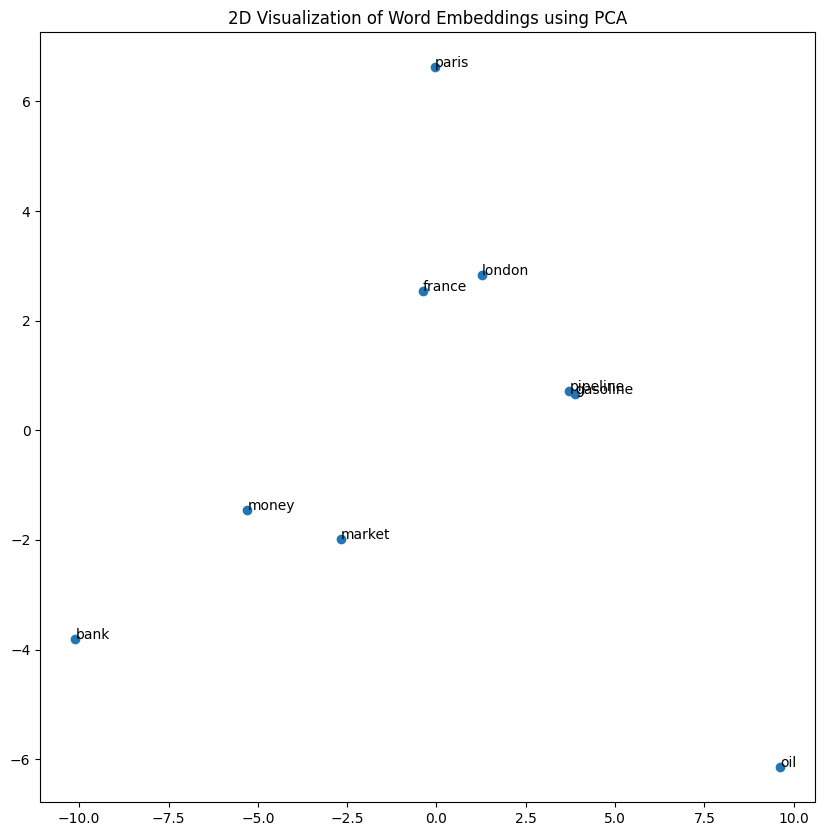

In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of words to visualize
words = ["market", "bank", "money", "gasoline", "pipeline", "oil", "london", "paris", "france"]
word_vectors = [word2vec_model.wv[word] for word in words]

# Convert the list of word vectors to a NumPy array
word_np = np.array(word_vectors)

# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
# fit_transform : train the model and apply dimension reduction
embeddings_pca = pca.fit_transform(word_np)

# Visualize the embeddings in 2D
plt.figure(figsize=(10, 10))
plt.scatter(x=embeddings_pca[:, 0], y=embeddings_pca[:, 1])

# Annotate the points with words
for i, word in enumerate(words):
  plt.text(x=embeddings_pca[i, 0], y=embeddings_pca[i, 1], s=word)

plt.title("2D Visualization of Word Embeddings using PCA")
plt.show()

# **PART II: Learning Representations from Images**

In this part of the practical work, students will build and train a **Masked Autoencoder (MAE)** using convolutional neural networks (CNNs) to reconstruct images with missing parts. The exercise begins by loading the **CIFAR-10** dataset, normalizing the pixel values, and applying random masks to the images to hide a portion of each one. Students will then define a simple CNN-based autoencoder, where the **encoder** extracts dense features from the image and the **decoder** reconstructs the masked image. Once the model is trained, students will extract and explore the **dense representations** (i.e., the encoded features) learned by the model. These representations are visualized using **t-SNE**, a dimensionality reduction technique, to project the high-dimensional representations into 2D space. The final visualization allows students to see how the model organizes different image classes and whether similar images cluster together based on their learned representations.


## Masking a Portion of the Image for Input Preprocessing

### Steps:

1. **Use GPU if Available:**
   - The code checks if a **GPU** is available for faster computations. If a GPU is available, the device is set to **cuda**; otherwise, the **CPU** is used. This is important for accelerating deep learning tasks.

2. **Masking Part of the Image:**
   - The `mask_image` function is used to hide a portion of each input image, which will be later used for learning. This masking is a preprocessing step to manipulate the input data.

3. **Masking Function:**
   - The `mask_image` function:
     - Takes an image as input and applies a random **mask** to hide part of the image.
     - The `mask_ratio` controls how much of the image is masked. A mask ratio of `0.80` means that 80% of the image will be hidden.
     - The function generates a random binary mask, where values greater than `mask_ratio` are kept (i.e., visible), and the others are masked.
   
4. **Application of the Mask:**
   - The masked image is then prepared for further processing by multiplying the binary mask with the original image.
   - The masked image is moved to the appropriate device (GPU or CPU) for efficient computation.
   
### Purpose:
This step prepares the data by masking parts of the input image, which will be later used for training a model to reconstruct or predict the missing regions.


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader, SubsetRandomSampler

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Function to mask part of the image (for self-supervised learning)
def mask_image(image, mask_ratio=0.80):
    # move image to appropriate device
    image = image.to(device)
    # Generate a random mask and apply it to the image
    mask = torch.rand_like(image) >= mask_ratio
    return image * mask

Using device: cuda


## Defining a Simple CNN-Based Masked Autoencoder (MAE)

### Steps:

1. **Define the Autoencoder Architecture:**
   - This part of the code defines a **Masked Autoencoder (MAE)** using a simple convolutional neural network (CNN).
   - The autoencoder is composed of two main components:
     - **Encoder**: A CNN-based architecture that extracts features from the input image.
     - **Decoder**: A transposed convolutional network that reconstructs the image from the extracted features, specifically focusing on reconstructing the masked parts of the image.

2. **Encoder:**
   - The encoder consists of two convolutional layers followed by **ReLU** activations and **MaxPooling** layers:
     - The first convolution layer extracts 16 feature maps from the input image.
     - The second convolution layer extracts 32 feature maps and reduces the spatial size of the image using max pooling.
   - The encoder learns to extract **dense representations** (features) of the input image.

3. **Decoder:**
   - The decoder is responsible for **reconstructing** the masked parts of the input image.
   - It consists of two transposed convolutional layers followed by **ReLU** activations:
     - The first layer upsamples the encoded features, and the second layer reconstructs the output with 3 channels (RGB image).
     - The **Sigmoid** activation normalizes the pixel values between 0 and 1, matching the input image format.

4. **Forward Pass:**
   - In the `forward` method:
     - The image is passed through the encoder to extract dense representations.
     - The decoder uses these representations to reconstruct the masked input.
   - The method returns both the encoded features and the reconstructed image.

### Purpose:
This autoencoder architecture will be used to learn how to reconstruct masked images, forcing the encoder to learn meaningful representations of the data even when parts of the input are missing. The reconstruction task helps in training a model that can generalize to understanding various image structures and patterns.


In [6]:
# Simple CNN-based MAE (Masked Autoencoder)
class SimpleMAE(nn.Module):
    def __init__(self):
        super(SimpleMAE, self).__init__()
        # Encoder (simple CNN to extract image features)
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # Decoder (reconstruct the masked part of the image)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)  # Extract dense representations
        decoded = self.decoder(encoded)  # Reconstruct the image
        return encoded, decoded  # Return both the encoding and the reconstruction

## Loading CIFAR-10 Dataset and Training the Masked Autoencoder

### Steps:

1. **Load and Preprocess the CIFAR-10 Dataset:**
   - The **CIFAR-10** dataset is a collection of 60,000 32x32 color images, divided into 10 classes. It is often used for image classification and reconstruction tasks.
   - The images are loaded using the **Torchvision** library. Each image is:
     - Converted to a **tensor** using `transforms.ToTensor()`.
     - **Normalized** to have pixel values between -1 and 1 using `transforms.Normalize()` with a mean and standard deviation of 0.5 for each color channel (RGB).

2. **Create DataLoader:**
   - A **DataLoader** is created to load batches of 64 images from the training set. The data is shuffled to ensure randomness in the training process.

3. **Model Instantiation:**
   - The **SimpleMAE** model (Masked Autoencoder) is instantiated and moved to the GPU (if available) for faster training.

4. **Define Loss Function and Optimizer:**
   - The loss function used is **Mean Squared Error (MSE)**, which measures the difference between the reconstructed image and the original image.
   - The optimizer is **Adam**, with a learning rate of 0.001, which adjusts the model weights during training to minimize the loss.

5. **Training the Model:**
   - The training process is defined in the `train_model()` function. This function trains the model for a specified number of epochs (in this case, 5 epochs):
     1. **Masking**: Each image in the batch is masked (with 75% of the pixels hidden) using the `mask_image` function.
     2. **Forward Pass**: The masked images are passed through the model, which attempts to reconstruct the original image.
     3. **Loss Calculation**: The difference between the reconstructed image and the original image is computed using the MSE loss.
     4. **Backpropagation**: The gradients are computed, and the optimizer updates the model parameters to minimize the loss.
     5. **Logging**: After each epoch, the average loss for that epoch is printed to track the model's progress.

6. **Training Loop:**
   - The model is trained over 5 epochs, and after each epoch, the loss value is printed to monitor the model's learning process.

### Purpose:
The purpose of this training process is to allow the model to learn to reconstruct images with parts of them masked. By minimizing the reconstruction loss, the model is forced to learn useful image representations, even when large parts of the input are missing.


In [7]:
# Load CIFAR-10 dataset and preprocess it (normalize pixel values)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Instantiate the model and move it to GPU
model = SimpleMAE().to(device)

# Define loss function (Mean Squared Error for image reconstruction) and optimizer (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, _ in train_loader:
            # Move images to GPU
            images = images.to(device)


            # Mask part of the images for training
            masked_images = torch.stack([mask_image(img, mask_ratio=0.75) for img in images])

            # Move masked images to GPU
            masked_images = masked_images.to(device)


            # Train the model
            optimizer.zero_grad()
            _, outputs = model(masked_images)

            # Focus on reconstruction
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()


            # Compare to original image


            running_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

# Train the model for 5 epochs
train_model(model, epochs=5)


100%|██████████| 170M/170M [00:18<00:00, 9.20MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch 1/5, Loss: 0.19983786982877175
Epoch 2/5, Loss: 0.16284760595549402
Epoch 3/5, Loss: 0.15963253354096352
Epoch 4/5, Loss: 0.1582625871119292
Epoch 5/5, Loss: 0.15742292859212823


## Extracting Dense Representations from the Model

### Steps:

1. **Model in Evaluation Mode:**
   - Before extracting dense representations, the model is switched to **evaluation mode** using `model.eval()`. This disables certain layers like dropout and batch normalization that are only used during training, ensuring the model behaves consistently for evaluation.

2. **Disable Gradient Calculation:**
   - The `torch.no_grad()` context is used to disable gradient computation. This reduces memory usage and speeds up the process since no backpropagation is needed when simply extracting features.

3. **Mask Images and Extract Representations:**
   - For each batch of images from the DataLoader:
     1. The images are moved to the **GPU** for efficient processing.
     2. Each image is **masked** using the `mask_image` function (e.g., 75% of the pixels are hidden).
     3. The masked images are passed through the **encoder** part of the model to extract their **dense features** (i.e., encoded representations).
     4. The encoded features are **flattened** and moved to the CPU for further processing.
   
4. **Store Representations and Labels:**
   - The **encoded representations** are appended to a list, and the corresponding **labels** (i.e., the class of the image) are also stored.
   - This allows us to associate each dense representation with the original label for later tasks like visualization or classification.

5. **Return the Results:**
   - After processing all batches, the dense representations are concatenated into a single array and returned along with their corresponding labels.

### Purpose:
The purpose of this function is to extract the **dense representations** learned by the encoder from the **Masked Autoencoder (MAE)**. These representations capture the most important features of the images, and they can be used for various tasks such as clustering, classification, or visualization of learned features.


In [8]:
# Function to extract dense representations after training
def extract_dense_representations(model, loader):
    model.eval()  # Set model to evaluation mode
    dense_representations = []
    labels = []

    with torch.no_grad():
        for images, image_labels in loader:
            images = images.to(device)
            masked_images = torch.stack([mask_image(img, mask_ratio=0.75) for img in images]).to(device)

            # Extract dense features (encoded representations)
            encoded, _ = model(masked_images)
            dense_representations.append(encoded.view(encoded.size(0), -1).cpu())  # Flatten and move to CPU
            labels.extend(image_labels.numpy())

    # Return dense representations and corresponding labels
    dense_representations = torch.cat(dense_representations).numpy()
    return dense_representations, labels


## Visualizing Dense Representations Using t-SNE

### Steps:

1. **Randomly Sample Images:**
   - A subset of 1000 images is randomly sampled from the **CIFAR-10** dataset for visualization.
   - The `np.random.choice()` function is used to select random indices from the dataset, and a `SubsetRandomSampler` ensures that only these images are loaded for processing.

2. **Extract Dense Representations:**
   - The **dense representations** for the sampled images are extracted using the `extract_dense_representations` function. This function passes the images through the trained autoencoder and retrieves the encoded features from the encoder.
   - The corresponding **labels** for each image are also retrieved for color-coding during visualization.

3. **Dimensionality Reduction with t-SNE:**
   - Since the dense representations are high-dimensional, **t-SNE** (t-distributed Stochastic Neighbor Embedding) is used to reduce the dimensionality to 2 components, making it easier to visualize.
   - t-SNE projects the data points into a 2D space while preserving local similarities between points, making it ideal for visualizing clusters of similar representations.

4. **Visualize the 2D Representation:**
   - The 2D projection of the dense representations is visualized using **Matplotlib**.
   - A scatter plot is created where each point represents a different image, and the points are color-coded according to their class labels (e.g., "oil", "market", etc.).
   - A color bar is added to the plot to indicate the class labels associated with each color.
   
5. **Interpret the Plot:**
   - After visualization, observe how the representations are organized in 2D space:
     - Images from the same class should ideally cluster together, showing that the model has learned useful representations for distinguishing between different image categories.

### Purpose:
The purpose of this function is to visualize the **dense representations** learned by the model using **t-SNE**. This allows you to understand how well the model has learned to represent different classes of images and how distinct these representations are.


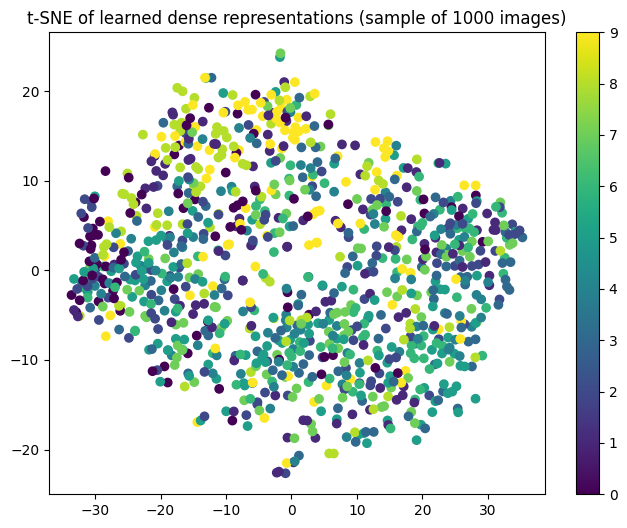

In [9]:
# Function to visualize dense representations with t-SNE
def visualize_dense_representations(model, loader, num_samples=1000):
    # Randomly sample 1000 images
    indices = np.random.choice(len(train_dataset), num_samples, replace=False)
    sampler = SubsetRandomSampler(indices)
    sample_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)

    # Extract dense representations for the sample
    dense_representations, labels = extract_dense_representations(model, sample_loader)

    # Perform dimensionality reduction with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_representations = tsne.fit_transform(dense_representations)

    # Visualize the 2D representation of dense features
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_representations[:, 0], reduced_representations[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('t-SNE of learned dense representations (sample of 1000 images)')
    plt.show()

# Visualize the representations (sample of 1000 images)
visualize_dense_representations(model, train_loader, num_samples=1000)
